In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import zipfile
from PIL import Image
from glob import glob

import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

from dataloader import DatasetMNIST, tensor2img
from model.efficientNet   import mnistEfficient
from utills import evaluation
from utills import get_clf_eval_multi, get_eval_threshold

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
dirty_mnist_answer = pd.read_csv("./dirty_mnist_2nd_answer.csv")
test_dataset = DatasetMNIST("dirty_mnist/train/", dirty_mnist_answer, mode='test', sub_data=False)
batch_size = 256
test_data_loader = DataLoader(
    test_dataset,
    batch_size = batch_size,
    shuffle = False,
    num_workers = 8,
    drop_last = False
)

In [3]:
model_weight = glob(os.path.join(os.getcwd(), 'test/*.pth'))
pred = evaluation(mnistEfficient, test_data_loader=test_data_loader, m=True, path=model_weight, device=device)
label = dirty_mnist_answer.columns[1:].tolist()
# 실제 y 가져오기
y = dirty_mnist_answer.iloc[:, 1:].values

Loaded pretrained weights for efficientnet-b0


In [16]:
get_clf_eval_multi(y, (pred >= 0.5) * 1, label)

Confusion mat for label : a
[[26864   179]
 [ 4155 18802]]
Confusion mat for label : b
[[26593   315]
 [ 3386 19706]]
Confusion mat for label : c
[[26547   292]
 [ 2411 20750]]
Confusion mat for label : d
[[26504   423]
 [ 3950 19123]]
Confusion mat for label : e
[[26763   251]
 [ 2206 20780]]
Confusion mat for label : f
[[26675   343]
 [ 3455 19527]]
Confusion mat for label : g
[[26507   307]
 [ 3454 19732]]
Confusion mat for label : h
[[26476   442]
 [ 3605 19477]]
Confusion mat for label : i
[[25446  1435]
 [ 4791 18328]]
Confusion mat for label : j
[[26584   332]
 [ 3500 19584]]
Confusion mat for label : k
[[26842   230]
 [ 2474 20454]]
Confusion mat for label : l
[[25584  1369]
 [ 5162 17885]]
Confusion mat for label : m
[[26738   326]
 [ 3102 19834]]
Confusion mat for label : n
[[26595   340]
 [ 3227 19838]]
Confusion mat for label : o
[[26090   680]
 [ 1783 21447]]
Confusion mat for label : p
[[26467   558]
 [ 3431 19544]]
Confusion mat for label : q
[[26474   266]
 [ 3934 19326

In [42]:
thresholds = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2]

# A에 대한 thr 보기
a = 0
get_eval_threshold(y[:, a], pred[:, a].reshape(-1,1) , thresholds)

**************************************************
Thresholds: 0.001
정확도: 0.9226, 정밀도: 0.9803, 재현율: 0.8485, F1:0.9096
**************************************************
Thresholds: 0.005
정확도: 0.9225, 정밀도: 0.9803, 재현율: 0.8482, F1:0.9095
**************************************************
Thresholds: 0.01
정확도: 0.9225, 정밀도: 0.9804, 재현율: 0.8481, F1:0.9094
**************************************************
Thresholds: 0.05
정확도: 0.9219, 정밀도: 0.9818, 재현율: 0.8455, F1:0.9086
**************************************************
Thresholds: 0.1
정확도: 0.9209, 정밀도: 0.9830, 재현율: 0.8422, F1:0.9072
**************************************************
Thresholds: 0.15
정확도: 0.9196, 정밀도: 0.9838, 재현율: 0.8387, F1:0.9055
**************************************************
Thresholds: 0.2
정확도: 0.9186, 정밀도: 0.9849, 재현율: 0.8356, F1:0.9041


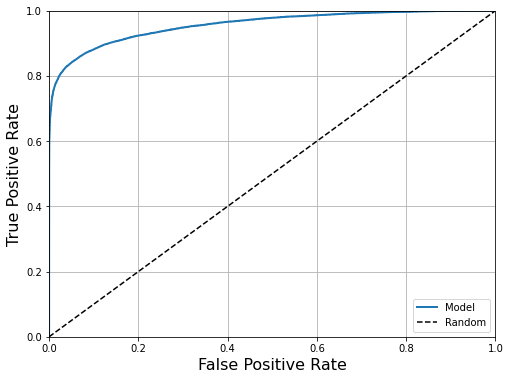

In [49]:
# ROC Curve A label에 대한
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y[:,0], pred[:,0])

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.legend(['Model', 'Random'], loc="best")
plt.show()